## 8. Neural networks and deep learning 
This week, we'll learn about neural nets and build a model for classifying images of clothes

## 8.1 Fashion Classification

Dataset:
    
    •	Full: https://github.com/alexeygrigorev/clothing-dataset
    •	Small: https://github.com/alexeygrigorev/clothing-dataset-small

Links:
    
     • https://cs231n.github.io/
    
    

In [2]:
# !git clone git@github.com:alexeygrigorev/clothing-dataset-small.git

## 8.2 TensorFlow and Keras

•Installing TensorFlow

• Loading Images


In [3]:
#!pip install matplotlib


In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras


In [3]:
from tensorflow.keras.preprocessing.image import load_img

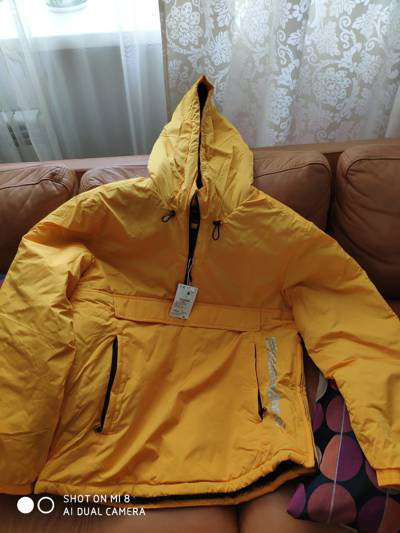

In [4]:
# for linux machine 
# path = './clothing-dataset-small-master/clothing-dataset-small-master/train/outwear'

path = 'C:/Users/justine.o_kobo360/Desktop/ML ZoomCamp Tutorials/Jupyter notebook/TensorFlow_Classification/clothing-dataset-small-master/clothing-dataset-small-master/train/outwear'
name = '0c6f89cd-30f6-4b44-bda5-0ba8d90e6717.jpg'
fullname = f'{path}/{name}'
load_img(fullname)

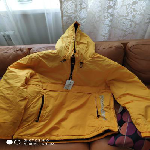

In [5]:
load_img(fullname, target_size=(150, 150))

In [6]:
img = load_img(fullname, target_size=(299, 299))

In [7]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x2A20ACF1D30>


In [8]:
x = np.array(img)
x.shape

(299, 299, 3)

## 8.3 Pre-trained convolutionation neural networks

•	Imagenet dataset: https://www.image-net.org
        
•	Pre-trained models: https://keras.io/api/applications



In [9]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions


In [10]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [11]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

In [12]:
X = preprocess_input(X)
X[0]

array([[[ 0.60784316,  0.6784314 ,  0.6392157 ],
        [ 0.77254903,  0.84313726,  0.81960785],
        [ 0.88235295,  0.92941177,  0.9137255 ],
        ...,
        [ 0.30196083,  0.43529415,  0.4901961 ],
        [ 0.20000005,  0.33333337,  0.38823533],
        [ 0.28627455,  0.41960788,  0.47450984]],

       [[ 0.8745098 ,  0.94509804,  0.90588236],
        [ 0.94509804,  0.99215686,  0.9764706 ],
        [ 0.96862745,  1.        ,  1.        ],
        ...,
        [ 0.37254906,  0.5058824 ,  0.56078434],
        [ 0.2941177 ,  0.427451  ,  0.48235297],
        [ 0.2941177 ,  0.427451  ,  0.48235297]],

       [[ 0.9529412 ,  1.        ,  0.9843137 ],
        [ 0.96862745,  1.        ,  1.        ],
        [ 0.9764706 ,  1.        ,  1.        ],
        ...,
        [ 0.45098042,  0.58431375,  0.6392157 ],
        [ 0.39607847,  0.5294118 ,  0.58431375],
        [ 0.34901965,  0.48235297,  0.5372549 ]],

       ...,

       [[-0.34117645, -0.62352943, -0.827451  ],
        [-0

In [13]:
pred = model.predict(X)

In [14]:
pred.shape

(1, 1000)

In [15]:
decode_predictions(pred)

[[('n04235860', 'sleeping_bag', 0.35455105),
  ('n04370456', 'sweatshirt', 0.15349536),
  ('n04033995', 'quilt', 0.06283881),
  ('n04479046', 'trench_coat', 0.030259997),
  ('n03709823', 'mailbag', 0.018577846)]]

## 8.4 Convolutional neural networks

• Types of layers: convolutional and dense 
    
• Convolutional layers and filters

• Dense layers 


There are more layers. Read here https://cs231n.github.io/






## 8.5 Transfer learning

•	Reading data with ImageDataGenerator

•	Train Xception on smaller images (150 x 150)

(Better to run it with a GPU)


In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [17]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [18]:
train_ds = train_gen.flow_from_directory(
    'C:/Users/justine.o_kobo360/Desktop/ML ZoomCamp Tutorials/Jupyter notebook/TensorFlow_Classification/clothing-dataset-small-master/clothing-dataset-small-master/train',
      target_size=(150, 150),
        batch_size=32
)

Found 3068 images belonging to 10 classes.


In [19]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [20]:
X, y = next(train_ds)

In [21]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory(
    'C:/Users/justine.o_kobo360/Desktop/ML ZoomCamp Tutorials/Jupyter notebook/TensorFlow_Classification/clothing-dataset-small-master/clothing-dataset-small-master/Validation',
      target_size=(150, 150),
        batch_size=32,
    shuffle=False
)


Found 341 images belonging to 10 classes.


In [23]:
base_model = Xception(weights='imagenet',
                      include_top=False,
                     input_shape=(150, 150, 3)
                     )

base_model.trainable = False

In [24]:
from tensorflow import keras


inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)

vectors = keras.layers.GlobalAveragePooling2D()(base)


outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [25]:
preds = model.predict(X)

In [26]:
preds.shape

(32, 10)

In [27]:
preds[0]

array([-0.16107899, -2.6224518 ,  0.14658508, -1.941445  , -0.3877793 ,
       -0.39560756,  1.6594571 ,  1.1356208 ,  0.23404819, -0.31283417],
      dtype=float32)

In [29]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [30]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 326s 3s/step - loss: 1.2858 - accuracy: 0.6565 - val_loss: 1.2920 - val_accuracy: 0.7214
Epoch 2/10
96/96 [==============================] - 326s 3s/step - loss: 0.5320 - accuracy: 0.8357 - val_loss: 1.0256 - val_accuracy: 0.7537
Epoch 3/10
96/96 [==============================] - 326s 3s/step - loss: 0.3696 - accuracy: 0.8765 - val_loss: 0.9645 - val_accuracy: 0.8240
Epoch 4/10
96/96 [==============================] - 340s 4s/step - loss: 0.2776 - accuracy: 0.9048 - val_loss: 1.1316 - val_accuracy: 0.7390
Epoch 5/10
96/96 [==============================] - 203s 2s/step - loss: 0.2103 - accuracy: 0.9263 - val_loss: 0.9058 - val_accuracy: 0.7977
Epoch 6/10
96/96 [==============================] - 194s 2s/step - loss: 0.1511 - accuracy: 0.9465 - val_loss: 0.9942 - val_accuracy: 0.7947
Epoch 7/10
96/96 [==============================] - 210s 2s/step - loss: 0.0814 - accuracy: 0.9726 - val_loss: 0.9930 - val_accuracy: 0.7918
Epoch 8/10
96

In [31]:
history.history['accuracy']

[0.6564537286758423,
 0.8357235789299011,
 0.8764667510986328,
 0.9048240184783936,
 0.9263363480567932,
 0.9465450048446655,
 0.9726206064224243,
 0.9820730090141296,
 0.991525411605835,
 0.9947848916053772]

In [32]:
history.history['val_accuracy']

[0.7214076519012451,
 0.7536656856536865,
 0.8240469098091125,
 0.7390029430389404,
 0.7976539731025696,
 0.7947214245796204,
 0.7917888760566711,
 0.8152492642402649,
 0.7976539731025696,
 0.7947214245796204]

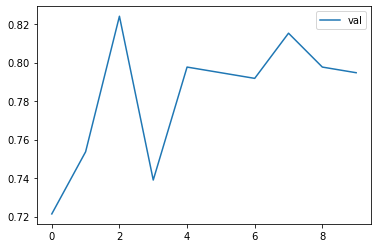

In [33]:
# plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()


##  8.6 Adjusting the learning rate

•	What's the learning rate

•	Trying different values 

In [39]:
def make_model(learning_rate=0.01):
    
    base_model = Xception(weights='imagenet',
                      include_top=False,
                     input_shape=(150, 150, 3)
                     )

    base_model.trainable = False
    
    ########################################
    
    inputs = keras.Input(shape=(150, 150, 3))

    base = base_model(inputs, training=False)

    vectors = keras.layers.GlobalAveragePooling2D()(base)


    outputs = keras.layers.Dense(10)(vectors)

    model = keras.Model(inputs, outputs)
    
   #######################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    return model
    

In [40]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr]= history.history
    print()
    print()

0.0001
Epoch 1/10
96/96 [==============================] - 223s 2s/step - loss: 1.9675 - accuracy: 0.3308 - val_loss: 1.6042 - val_accuracy: 0.4956
Epoch 2/10
96/96 [==============================] - 209s 2s/step - loss: 1.4138 - accuracy: 0.5359 - val_loss: 1.2462 - val_accuracy: 0.6158
Epoch 3/10
96/96 [==============================] - 201s 2s/step - loss: 1.1587 - accuracy: 0.6307 - val_loss: 1.0688 - val_accuracy: 0.6745
Epoch 4/10
32/96 [=========>....................] - ETA: 2:47 - loss: 1.0415 - accuracy: 0.6602

KeyboardInterrupt: 

In [ ]:
del scores[0.1]
del scores[0.0001]

In [ ]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label='train=%s' % lr
    plt.plot(hist['val_accuracy'], label='val=%s' % lr)
    
plt.xtick(np.arange(10))
plt.legend()

In [34]:
learning_rate = 0.001

optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [35]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 234s 2s/step - loss: 0.0133 - accuracy: 0.9993 - val_loss: 0.9156 - val_accuracy: 0.8094
Epoch 2/10
96/96 [==============================] - 235s 2s/step - loss: 0.0090 - accuracy: 0.9990 - val_loss: 0.9226 - val_accuracy: 0.8035
Epoch 3/10
96/96 [==============================] - 226s 2s/step - loss: 0.0081 - accuracy: 0.9993 - val_loss: 0.9362 - val_accuracy: 0.8152
Epoch 4/10
96/96 [==============================] - 217s 2s/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.9181 - val_accuracy: 0.8182
Epoch 5/10
96/96 [==============================] - 223s 2s/step - loss: 0.0062 - accuracy: 0.9997 - val_loss: 0.9247 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 219s 2s/step - loss: 0.0061 - accuracy: 0.9997 - val_loss: 0.9537 - val_accuracy: 0.8065
Epoch 7/10
96/96 [==============================] - 211s 2s/step - loss: 0.0065 - accuracy: 0.9993 - val_loss: 0.9421 - val_accuracy: 0.8065
Epoch 8/10
96

In [36]:
history.history['val_accuracy']

[0.8093841671943665,
 0.803519070148468,
 0.8152492642402649,
 0.8181818127632141,
 0.8181818127632141,
 0.8064516186714172,
 0.8064516186714172,
 0.8064516186714172,
 0.8123167157173157,
 0.8123167157173157]

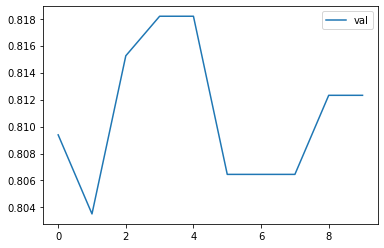

In [37]:
plt.plot(history.history['val_accuracy'], label='val')

plt.legend()

##  8.7 Checkpointing

•	Saving the best model only 

•	Training a model with callbacks

In [34]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5')

##  8.8 Adding more layers

•   Adding one inner dense layer 

•   Experimenting with different sizes of inner layer
